# Validaciones - Pobreza

#### Tablas 2010 - Personas - Total Pais

- Poblacion y porcentaje por Pobreza SI
- Poblacion y porcentaje por Indigencia SI


- Poblacion y porcentaje por Pobreza SI y AGLO SI
- Poblacion y porcentaje por Indigencia SI y AGLO SI


- Poblacion y porcentaje Por Pobreza SI y Aglomerado
- Poblacion y porcentaje Por Indigencia SI y Aglomerado


- Poblacion y porcentaje Por Pobreza SI y Provincia
- Poblacion y porcentaje Por Indigencia SI y Provincia



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

import pandas as pd
import datetime as dt
from IPython.display import display, Markdown, Latex

import glob
frac = 0.01

# path ='./../data/Pobreza/pobreza_' # use your path
path ='/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
# allFiles[::4]


def moving_avg(table):
    ## Label left. The roilling means are centered nearly on the right date, although one day early.
    # i.e. 2009-12-31 is the average for 07-2009 to 06-2010
    return table.resample('QS').mean().interpolate('linear').rolling(4, center = True).mean()


### Funcion para cargar G sheets

In [2]:
from oauth2client.service_account import ServiceAccountCredentials
import gspread
from numpy import array, nan

def load_spreadsheet(key, worksheet = 0):

    scope = ['https://spreadsheets.google.com/feeds',
             'https://www.googleapis.com/auth/drive']

    credentials = ServiceAccountCredentials.from_json_keyfile_name(
             './../../../Desktop/fourth-stock-325317-605e9494d4f6.json', scope) # Your json file here

    gc = gspread.authorize(credentials)

    wks = gc.open_by_key(key).get_worksheet(worksheet)

    data = array(wks.get_all_values())

    return data


In [3]:
aglo_labels = pd.read_csv('./../data/info/aglo_labels.csv')

In [4]:
df_list = []
for f in allFiles[::4]:
    print(f)
    
    groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
    vars_ = ['Pobreza', 'Indigencia']
    
    data = pd.read_csv(f, usecols = ['Q'] + groupers + vars_)
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
    data['Total'] = True
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Personas'
    out = sums.reset_index()

    df_list += [out]
    
df = pd.concat(df_list)
df['Q'] = pd.to_datetime(df['Q'])
df10 = df.loc[df.Q.dt.year == 2010]

/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2006-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2007-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2008-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2009-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2010-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2011-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2012-11-15.csv
/media/mig

In [5]:
# Stats a nivel Hogar

mon_cols = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IPCF']

df_list = []
for f in allFiles[::4]:
    print(f)
    groupers = ['AGLOMERADO', 'PROV', 'NOMPROV']
    vars_ = ['Pobreza', 'Indigencia']
#     vars_ = ['P47T_hogar', 'CBA', 'CBT', 'gap_pobreza', 'gap_indigencia', 'IX_TOT']

    data = pd.read_csv(f, usecols = ['HOGAR_REF_ID', 'Q'] + groupers + vars_)
    data = data.drop_duplicates()
    data = data.merge(aglo_labels)
    data['AGLO_si'] = data.AGLOMERADO != 0
#     data = data.loc[data.AGLOMERADO != 0]
    data['Total'] = True
        
#     data['IPCF'] = data['P47T_hogar']/data['IX_TOT']
    
    sums = data.groupby(['Total', 'AGLO_si', 'NOMAGLO'] + groupers + ['Q'] + vars_).size()
    sums = sums/frac
    sums.name = 'Hogares'
    out = sums.reset_index()

    df_list += [out]
    
dfH = pd.concat(df_list)
dfH['Q'] = pd.to_datetime(dfH['Q'])
dfH10 = dfH.loc[dfH.Q.dt.year == 2010]

/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2003-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2004-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2005-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2006-08-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2007-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2008-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2009-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2010-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2011-11-15.csv
/media/miglesia/Elements/suite/indice-pobreza-ExactasUBA/data/Pobreza/pobreza_0.01_q2012-11-15.csv
/media/mig

In [6]:
# Index(['index', 'RADIO_REF_ID', 'URP', 'DPTO', 'HOGAR_REF_ID', 'H15', 'H16',
#        'PERSONA_REF_ID', 'P02', 'P03', 'P09', 'P10', 'CONDACT', 'IX_TOT',
#        'CAT_OCUP', 'CAT_INAC', 'INGRESO', 'INGRESO_NLB', 'INGRESO_JUB',
#        'INGRESO_SBS', 'PP07K', 'P47T_persona', 'ANO4', 'Q', 'P0910',
#        'Grupo_Etario_3', 'Grupo_Etario_INDEC', 'Grupo_Etario_q10',
#        'P47T_hogar', 'CBA', 'CBT', 'CB_EQUIV', 'Pobreza', 'Indigencia',
#        'Pobreza_5usd', 'gap_pobreza', 'gap_indigencia', 'IDFRAC', 'PROV',
#        'NOMPROV', 'AGLOMERADO', 'Region'],
#       dtype='object')

## Personas. Total Pais. Poblacion por condicion de Pobreza / Indigencia

In [7]:
data = df10

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()
    tabla = pd.concat([tabla, round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla.columns = ['Cantidad', 'Porcentaje']

    tabla.loc['TOTAL'] = tabla.sum();
    
    display(tabla)

### Pobreza

,Cantidad,Porcentaje
Pobreza,,
False,28687900.0,71.8
True,11282500.0,28.2
TOTAL,39970400.0,100.0


### Indigencia

,Cantidad,Porcentaje
Indigencia,,
False,36996700.0,92.6
True,2973700.0,7.4
TOTAL,39970400.0,100.0


## Por AGLO SI/NO

In [8]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'AGLO_si'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e6, 2), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (mill.)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'AGLO_si'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_)

### Pobreza

Cantidad (mill.)        Porcentaje (%)       
AGLO_si            False   True          False   True
Pobreza                                              
False               9.39  19.30           63.6   76.6
True                5.37   5.91           36.4   23.4
TOTAL              14.76  25.21          100.0  100.0

### Indigencia

Cantidad (mill.)        Porcentaje (%)       
AGLO_si               False   True          False   True
Indigencia                                              
False                 13.12  23.87           88.9   94.7
True                   1.63   1.34           11.1    5.3
TOTAL                 14.75  25.21          100.0  100.0

## En Aglomerados. Serie de Tiempo

### Pobreza.

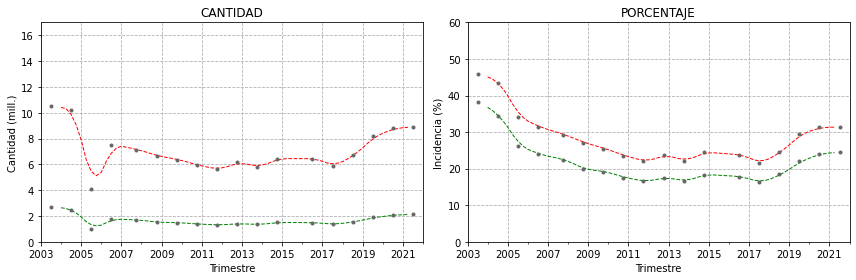

### Indigencia.

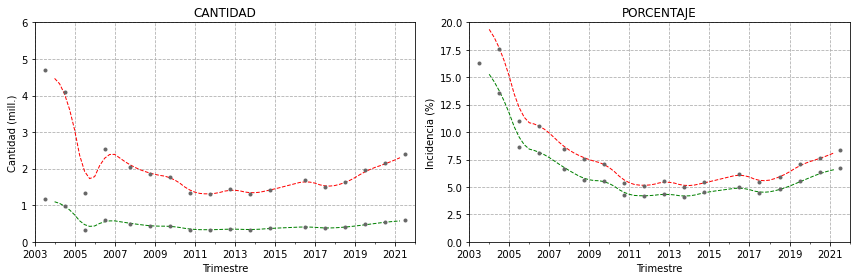

In [9]:

for j, col in enumerate(['Pobreza', 'Indigencia']):
    display(Markdown('### '+col+'.'))

    fig, axs = plt.subplots(1, 2, figsize = (12, 4))
    
    for i, data in enumerate([df, dfH]):

        data = data.loc[(data.AGLO_si == True)]

        table = data.groupby(['Q', col])[['Personas', 'Hogares'][i]].sum().unstack()
        table = table/1e6
        table_pct = 100*table.div(table.sum(1), axis = 0)

        ax = axs[1]
        ax.set_title('PORCENTAJE')
        moving_avg(table_pct[True]).plot(ax = ax, lw = 1, color = ['r', 'g'][i], linestyle = '--')
        table_pct[True].plot(ax =ax, marker = '.', lw = 0, color = '.4')
        ax.grid(linestyle = '--')
        ax.set_xlim('2003', '2022')
        ax.set_ylim(0, [60, 20][j])
        ax.set_xlabel('Trimestre')
        ax.set_ylabel('Incidencia (%)')    

        ax = axs[0]
        ax.set_title('CANTIDAD')
        moving_avg(table[True]).plot(ax = ax, lw = 1, color = ['r', 'g'][i], linestyle = '--')
        table[True].plot(ax = ax, marker = '.', lw = 0, color = '.4')
        ax.grid(linestyle = '--')
        ax.set_xlim('2003', '2022')
        ax.set_ylim(0, [17, 6][j])
        ax.set_xlabel('Trimestre')
        ax.set_ylabel('Cantidad (mill.)')

    plt.tight_layout()
    plt.savefig('./../images/pobreza1_'+col+'.png')
    plt.show()

## Comparacion con Fuentes alternativas

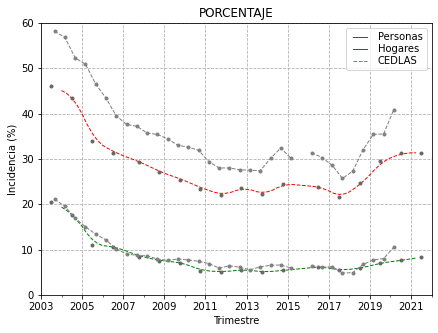

In [10]:
data = df.loc[(df.AGLO_si == True)]

fig, ax = plt.subplots(1, figsize = (7, 5))

colors = ['r', 'g']
### Serie propia
for i, col in enumerate(['Pobreza', 'Indigencia']):
    table = data.groupby(['Q', col])['Personas'].sum().unstack()
    table = table/1e6
    table_pct = 100*table.div(table.sum(1), axis = 0)

    moving_avg(table_pct[True]).plot(ax = ax, lw = 1, color = colors[i], linestyle = '--')
    table_pct[True].plot(ax =ax, marker = '.', lw = 0, color = '.4')

### serie CEDLAS
cedlas = pd.read_csv('./../data/info/CEDLAS.csv', decimal=',')
cedlas.index = pd.date_range(start = '2003-09-01', periods=len(cedlas), freq = '6M')
cedlas = cedlas[['Pobreza', 'Indigencia']].astype(float)

cedlas.plot(ax = ax, color = '.5', linestyle = '--', lw = 1, marker = '.')


## Plot format

# ax = axs[1]
ax.set_title('PORCENTAJE')
ax.grid(linestyle = '--')
ax.set_xlim('2003', '2022')
ax.set_ylim(0, 60)
ax.set_xlabel('Trimestre')
ax.set_ylabel('Incidencia (%)')    

# Leyenda
pts1 = mlines.Line2D([], [], color=colors[0], lw = 1, label='Personas')
pts2 = mlines.Line2D([], [], color=colors[1], lw = 1, label='Hogares')
cedlas = mlines.Line2D([], [], color = '.5', linestyle = '--', lw = 1, label='CEDLAS')
ax.legend(handles=[pts1, pts2, cedlas], numpoints = 3, labelspacing = .2)

plt.savefig('./../images/pobreza2.png')
plt.show()

## Total Pais. Serie de Tiempo

### Pobreza.

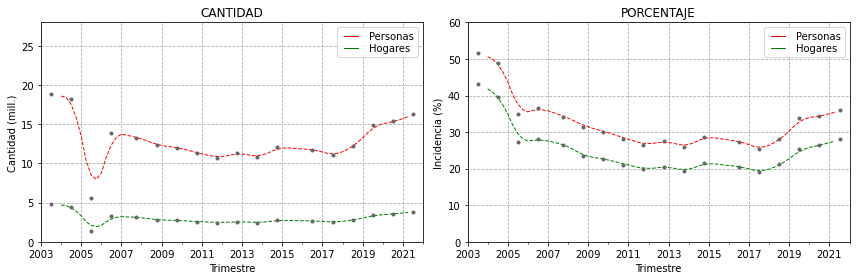

### Indigencia.

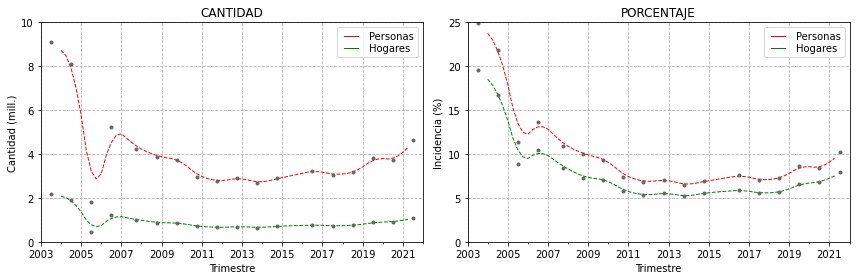

In [11]:

for j, col in enumerate(['Pobreza', 'Indigencia']):
    display(Markdown('### '+col+'.'))

    fig, axs = plt.subplots(1, 2, figsize = (12, 4))
    
    for i, data in enumerate([df, dfH]):

#         data = data.loc[(data.AGLO_si == True)]

        table = data.groupby(['Q', col])[['Personas', 'Hogares'][i]].sum().unstack()
        table = table/1e6
        table_pct = 100*table.div(table.sum(1), axis = 0)

        ax = axs[1]
        ax.set_title('PORCENTAJE')
        moving_avg(table_pct[True]).plot(ax = ax, lw = 1, color = ['r', 'g'][i], linestyle = '--')
        table_pct[True].plot(ax =ax, marker = '.', lw = 0, color = '.4')
        ax.set_ylim(0, [60, 25][j])
        ax.set_ylabel('Incidencia (%)')    

        ax = axs[0]
        ax.set_title('CANTIDAD')
        moving_avg(table[True]).plot(ax = ax, lw = 1, color = ['r', 'g'][i], linestyle = '--')
        table[True].plot(ax = ax, marker = '.', lw = 0, color = '.4')
        ax.set_ylim(0, [28, 10][j])
        ax.set_ylabel('Cantidad (mill.)')

        # Leyenda
        pts1 = mlines.Line2D([], [], color=colors[0], lw = 1, label='Personas')
        pts2 = mlines.Line2D([], [], color=colors[1], lw = 1, label='Hogares')
#         cedlas = mlines.Line2D([], [], color = '.5', linestyle = '--', lw = 1, label='CEDLAS')
        for ax in axs:
            ax.grid(linestyle = '--')
            ax.set_xlim('2003', '2022')
            ax.set_xlabel('Trimestre')
            ax.legend(handles=[pts1, pts2], numpoints = 3, labelspacing = .2)

    plt.tight_layout()
    plt.savefig('./../images/pobreza3_'+col+'.png')
    plt.show()

## Por AGLOMERADOS

In [12]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'NOMAGLO'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e3, 1), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (miles)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'AGLOMERADO'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_.stack(0).T)

### Pobreza

Pobreza                       False                            True  \
                   Cantidad (miles) Porcentaje (%) Cantidad (miles)   
AGLOMERADO                                                            
Bahia Blanca                  230.9           80.4             56.4   
CABA                         2633.4           91.6            242.4   
Catamarca                     120.1           65.6             63.0   
Cdro Rivadavia                137.7           90.1             15.1   
Concordia                      99.0           63.9             55.9   
Cordoba                      1119.6           76.8            337.9   
Corrientes                    224.1           63.8            127.2   
Formosa                       126.0           55.9             99.3   
Fuera de aglom.              9385.4           63.6           5369.5   
GBA                          8019.9           75.7           2577.6   
Jujuy                         204.3           68.6             93.3   
La Plata                      639.0           81.2            148.4   
La Rioja                      110.4           62.3             66.8   
Mar del Plata                 473.5           79.4            122.8   
Mendoza                       696.8           74.7            235.7   
Neuquen                       257.5           77.7             73.7   
Parana                        208.5           77.3             61.4   
Posadas                       191.8           63.5            110.1   
Rawson-Trelew                  88.8           76.1             27.9   
Resistencia                   237.7           61.9            146.3   
Rio Cuarto                    123.0           76.9             36.9   
Rio Gallegos                   90.0           91.1              8.8   
Rosario                       949.6           78.8            255.1   
Salta                         378.2           69.8            164.0   
San Juan                      254.7           62.4            153.4   
San Luis                      124.5           71.3             50.0   
San Nicolas                   130.7           74.8             44.0   
Santa Fe                      353.8           74.1            123.9   
Santa Rosa                     90.0           82.3             19.4   
Sgo del Estero                246.7           69.1            110.5   
Tucuman                       578.0           68.6            264.1   
Ushuaia-Rio Grande            100.3           93.9              6.5   
Viedma-Patagones               64.0           80.8             15.2   

Pobreza                                      TOTAL                 
                   Porcentaje (%) Cantidad (miles) Porcentaje (%)  
AGLOMERADO                                                         
Bahia Blanca                 19.6            287.3          100.0  
CABA                          8.4           2875.8          100.0  
Catamarca                    34.4            183.1          100.0  
Cdro Rivadavia                9.9            152.8          100.0  
Concordia                    36.1            154.9          100.0  
Cordoba                      23.2           1457.5          100.0  
Corrientes                   36.2            351.3          100.0  
Formosa                      44.1            225.3          100.0  
Fuera de aglom.              36.4          14754.9          100.0  
GBA                          24.3          10597.5          100.0  
Jujuy                        31.4            297.6          100.0  
La Plata                     18.8            787.4          100.0  
La Rioja                     37.7            177.2          100.0  
Mar del Plata                20.6            596.3          100.0  
Mendoza                      25.3            932.5          100.0  
Neuquen                      22.3            331.2          100.0  
Parana                       22.7            269.9          100.0  
Posadas                      36.5            301.9          100.0  
Rawson-Trelew  

### Indigencia

Indigencia                    False                            True  \
                   Cantidad (miles) Porcentaje (%) Cantidad (miles)   
AGLOMERADO                                                            
Bahia Blanca                  275.8           96.0             11.5   
CABA                         2810.9           97.7             64.9   
Catamarca                     166.6           91.0             16.5   
Cdro Rivadavia                146.6           95.9              6.2   
Concordia                     137.9           89.0             17.0   
Cordoba                      1393.0           95.6             64.5   
Corrientes                    313.1           89.1             38.2   
Formosa                       198.6           88.1             26.7   
Fuera de aglom.             13122.7           88.9           1632.2   
GBA                         10071.2           95.0            526.3   
Jujuy                         275.3           92.5             22.3   
La Plata                      751.4           95.4             36.0   
La Rioja                      167.4           94.5              9.8   
Mar del Plata                 568.0           95.3             28.3   
Mendoza                       886.6           95.1             45.9   
Neuquen                       315.9           95.4             15.3   
Parana                        258.5           95.8             11.4   
Posadas                       269.9           89.4             32.0   
Rawson-Trelew                 110.3           94.5              6.4   
Resistencia                   343.9           89.6             40.1   
Rio Cuarto                    151.4           94.7              8.5   
Rio Gallegos                   96.7           97.9              2.1   
Rosario                      1145.9           95.1             58.8   
Salta                         501.9           92.6             40.3   
San Juan                      368.2           90.2             39.9   
San Luis                      163.0           93.4             11.5   
San Nicolas                   163.6           93.6             11.1   
Santa Fe                      443.2           92.8             34.5   
Santa Rosa                    105.8           96.7              3.6   
Sgo del Estero                326.5           91.4             30.7   
Tucuman                       765.5           90.9             76.6   
Ushuaia-Rio Grande            105.9           99.2              0.9   
Viedma-Patagones               75.5           95.3              3.7   

Indigencia                                   TOTAL                 
                   Porcentaje (%) Cantidad (miles) Porcentaje (%)  
AGLOMERADO                                                         
Bahia Blanca                  4.0            287.3          100.0  
CABA                          2.3           2875.8          100.0  
Catamarca                     9.0            183.1          100.0  
Cdro Rivadavia                4.1            152.8          100.0  
Concordia                    11.0            154.9          100.0  
Cordoba                       4.4           1457.5          100.0  
Corrientes                   10.9            351.3          100.0  
Formosa                      11.9            225.3          100.0  
Fuera de aglom.              11.1          14754.9          100.0  
GBA                           5.0          10597.5          100.0  
Jujuy                         7.5            297.6          100.0  
La Plata                      4.6            787.4          100.0  
La Rioja                      5.5            177.2          100.0  
Mar del Plata                 4.7            596.3          100.0  
Mendoza                       4.9            932.5          100.0  
Neuquen                       4.6            331.2          100.0  
Parana                        4.2            269.9          100.0  
Posadas                      10.6            301.9          100.0  
Rawson-Trelew  

## Comparacion con INDEC

In [13]:
### Data INDEC

datos = load_spreadsheet('1ZxNStcxYaJoUZfM4hEIHbonRiTbFzJM2qLkS4RKFntM', worksheet=3)

df_ = pd.DataFrame(datos)
df_, df_.columns = df_[1:] , df_.iloc[0]
# Set index
df_ = df_.set_index(['AGLO_ID', 'AGLOMERADO', 'NOMAGLO', 'Q'])
df_.columns.name = 'Cant. Pers.'

df_ = df_.astype(float)

## Year avg:
df_ = df_.reset_index()
tabla_indec = df_.groupby(['AGLOMERADO', 'NOMAGLO']).mean()

In [14]:
### Data MI
data = df10; col = 'Pobreza'
tabla = data.groupby(['Q', 'AGLOMERADO', 'NOMAGLO', col])['Personas'].sum().unstack([-3, -2, -1]).mean()
tabla = tabla.unstack()
tabla = tabla.fillna(0)
tabla.index = tabla.index.set_levels(tabla.index.levels[0].astype(str), level=0)

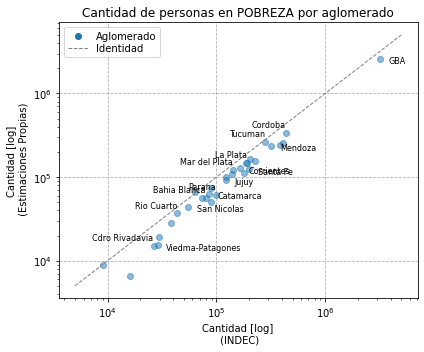

In [15]:
info = pd.concat([tabla_indec['pobreza_sum'], tabla[True]], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
info.index = info.index.droplevel(0)

fig, ax = plt.subplots(1, figsize = (6, 5))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = ax, alpha = .5)

ax.plot([5e3, 5e6], [5e3, 5e6], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.sort_values('INDEC')[2::4].iterrows():
    ax.annotate(i, (row[0], row[1]*1.1), ha = 'right', va = 'bottom', fontsize = 8)
for i, row in info.sort_values('INDEC')[3::4].iterrows():
    ax.annotate(i, (row[0]*1.2, row[1]/1.2), ha = 'left', va = 'bottom', fontsize = 8)

## Plot Format
ax.set_title('Cantidad de personas en POBREZA por aglomerado')
ax.grid(linestyle = '--') # Grid
ax.set_xscale('log'); ax.set_yscale('log'); # Escala Log
# Formatos de ejes X, Y
ax.set_xlabel('Cantidad [log]\n (INDEC)'); ax.set_ylabel('Cantidad [log]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Aglomerado')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

plt.tight_layout()
plt.savefig('./../images/pobreza4.png')
plt.show()


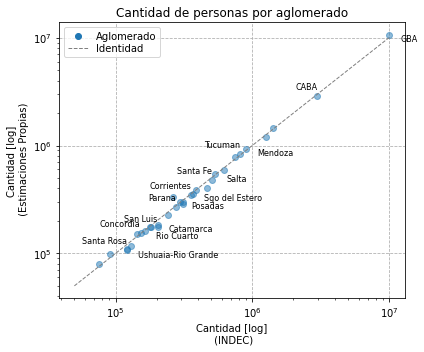

In [16]:
info = pd.concat([tabla_indec['poblacion_sum'], tabla.sum(1)], axis = 1).dropna()#.sum()
info.columns = ['INDEC', 'MI']
info.index = info.index.droplevel(0)

fig, ax = plt.subplots(1, figsize = (6, 5))

info.plot(x = 'INDEC', y = 'MI', marker = 'o', lw = 0, ax = ax, alpha = .5)

ax.plot([5e4, 1e7], [5e4, 1e7], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.sort_values('INDEC')[2::4].iterrows():
    ax.annotate(i, (row[0], row[1]*1.1), ha = 'right', va = 'bottom', fontsize = 8)
for i, row in info.sort_values('INDEC')[3::4].iterrows():
    ax.annotate(i, (row[0]*1.2, row[1]/1.2), ha = 'left', va = 'bottom', fontsize = 8)

## Plot Format
ax.set_title('Cantidad de personas por aglomerado')
ax.grid(linestyle = '--') # Grid
ax.set_xscale('log'); ax.set_yscale('log'); # Escala Log
# Formatos de ejes X, Y
ax.set_xlabel('Cantidad [log]\n (INDEC)'); ax.set_ylabel('Cantidad [log]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Aglomerado')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

plt.tight_layout()
plt.savefig('./../images/pobreza5.png')
plt.show()


In [17]:
import seaborn as sns
import numpy as np

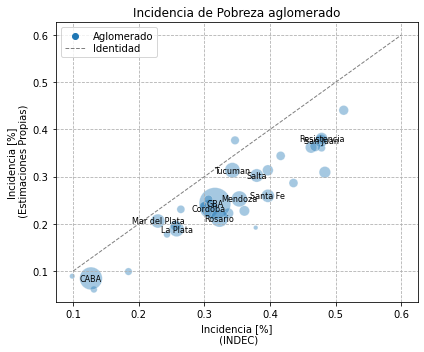

In [18]:
info = pd.concat([tabla_indec['pobreza_mean'], 
                  tabla[True].div(tabla.sum(1), 1),
                 np.sqrt(tabla_indec['poblacion_sum'])], axis = 1).dropna()#.sum()
info.index = info.index.droplevel(0)
info.columns = ['INDEC', 'MI', 'poblacion']
fig, ax = plt.subplots(1, figsize = (6, 5))

# info.plot(x = 'INDEC', y = 'MI', size = 'poblacion', marker = 'o', lw = 0, ax = axs)
sns.scatterplot(data=info, x="INDEC", y="MI", size="poblacion", legend=False, sizes=(20, 1000), alpha = .4)

ax.plot([.1, .6], [.1, .6], lw = 1, linestyle = '--', c = '.5')

## Annotations
for i, row in info.sort_values('poblacion').tail(12).iterrows():
    ax.annotate(i, (row[0], row[1]), ha = 'center', va = 'center', fontsize = 8)

## Plot Format
ax.set_title('Incidencia de Pobreza aglomerado')
ax.grid(linestyle = '--') # Grid

# Formatos de ejes X, Y
ax.set_xlabel('Incidencia [%]\n (INDEC)'); ax.set_ylabel('Incidencia [%]\n (Estimaciones Propias)'); 

# # Leyenda
pts1 = mlines.Line2D([], [], marker = 'o', color='#1f77b4', lw = 0, label='Aglomerado')
line = mlines.Line2D([], [], color='.5', linestyle = '--', lw = 1, label='Identidad')

ax.legend(handles=[pts1, line], numpoints = 1, labelspacing = .2)

plt.tight_layout()
plt.savefig('./../images/pobreza6.png')
plt.show()


## Por PROVINCIAS

In [19]:
# data = df10.loc[df10.AGLO_si == 1]

for col in ['Pobreza', 'Indigencia']:
    display(Markdown('### '+col))
#     tabla = data.groupby(['Q', col])['Personas'].sum().unstack().mean()    
    tabla = df10.groupby(['Q', col, 'NOMPROV'])['Personas'].sum().unstack([-2, -1]).mean()
    tabla = tabla.unstack()
    
    tabla_ = pd.concat([round(tabla/1e3, 1), round(100*tabla/tabla.sum(), 1)], axis = 1)
    tabla_.columns = pd.MultiIndex.from_product([['Cantidad (miles)', 'Porcentaje (%)'], tabla.columns],
                               names = ['', 'PROVINCIA'])
    
    tabla_.loc['TOTAL'] = tabla_.sum();
    
    display(tabla_.stack(0).T)

### Pobreza

Pobreza                                    False                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                             11907.4           76.6   
Catamarca                                  226.6           60.6   
Chaco                                      513.0           48.4   
Chubut                                     396.8           80.5   
Ciudad Autónoma de Buenos Aires           2633.9           91.6   
Corrientes                                 521.0           52.2   
Córdoba                                   2470.7           74.7   
Entre Ríos                                 841.9           67.5   
Formosa                                    255.4           47.8   
Jujuy                                      408.0           61.4   
La Pampa                                   244.2           77.1   
La Rioja                                   197.6           59.7   
Mendoza                                   1173.6           68.2   
Misiones                                   560.7           50.9   
Neuquén                                    419.4           77.0   
Río Negro                                  484.2           77.4   
Salta                                      693.1           57.3   
San Juan                                   388.4           57.7   
San Luis                                   283.4           66.2   
Santa Cruz                                 228.9           83.6   
Santa Fe                                  2377.1           75.3   
Santiago del Estero                        453.1           52.0   
Tierra del Fuego                           114.1           90.3   
Tucumán                                    895.4           60.2   

Pobreza                                     True                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                              3639.3           23.4   
Catamarca                                  147.2           39.4   
Chaco                                      547.3           51.6   
Chubut                                      96.3           19.5   
Ciudad Autónoma de Buenos Aires            242.4            8.4   
Corrientes                                 477.7           47.8   
Córdoba                                    836.9           25.3   
Entre Ríos                                 405.0           32.5   
Formosa                                    278.6           52.2   
Jujuy                                      256.8           38.6   
La Pampa                                    72.4           22.9   
La Rioja                                   133.5           40.3   
Mendoza                                    546.0           31.8   
Misiones                                   541.2           49.1   
Neuquén                                    125.2           23.0   
Río Negro                                  141.2           22.6   
Salta                                      515.8           42.7   
San Juan                                   285.1           42.3   
San Luis                                   144.9           33.8   
Santa Cruz                                  44.8           16.4   
Santa Fe                                   780.8           24.7   
Santiago del Estero                        418.9           48.0   
Tierra del Fuego                            12.3            9.7   
Tucumán                                    592.9           39.8   

Pobreza                                    TOTAL                 
                                Cantidad (miles) Porcentaje (%)  
PROVINCIA                                                        
Buenos Aires                             15546.7          100.0  
Catamarca                                  373.8          100.0  
Chaco                                     1060.3  

### Indigencia

Indigencia                                 False                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                             14770.2           95.0   
Catamarca                                  329.3           88.1   
Chaco                                      866.1           81.7   
Chubut                                     465.2           94.3   
Ciudad Autónoma de Buenos Aires           2811.4           97.7   
Corrientes                                 837.2           83.8   
Córdoba                                   3130.1           94.6   
Entre Ríos                                1129.9           90.6   
Formosa                                    447.9           83.9   
Jujuy                                      589.9           88.7   
La Pampa                                   299.7           94.7   
La Rioja                                   306.4           92.5   
Mendoza                                   1607.2           93.5   
Misiones                                   921.7           83.6   
Neuquén                                    510.6           93.8   
Río Negro                                  578.3           92.5   
Salta                                     1041.3           86.1   
San Juan                                   595.2           88.4   
San Luis                                   397.9           92.9   
Santa Cruz                                 266.8           97.5   
Santa Fe                                  2959.5           93.7   
Santiago del Estero                        713.3           81.8   
Tierra del Fuego                           123.0           97.3   
Tucumán                                   1298.6           87.3   

Indigencia                                  True                 \
                                Cantidad (miles) Porcentaje (%)   
PROVINCIA                                                         
Buenos Aires                               776.5            5.0   
Catamarca                                   44.5           11.9   
Chaco                                      194.2           18.3   
Chubut                                      27.9            5.7   
Ciudad Autónoma de Buenos Aires             64.9            2.3   
Corrientes                                 161.5           16.2   
Córdoba                                    177.5            5.4   
Entre Ríos                                 117.0            9.4   
Formosa                                     86.1           16.1   
Jujuy                                       74.9           11.3   
La Pampa                                    16.9            5.3   
La Rioja                                    24.7            7.5   
Mendoza                                    112.4            6.5   
Misiones                                   180.2           16.4   
Neuquén                                     34.0            6.2   
Río Negro                                   47.1            7.5   
Salta                                      167.6           13.9   
San Juan                                    78.3           11.6   
San Luis                                    30.4            7.1   
Santa Cruz                                   6.9            2.5   
Santa Fe                                   198.4            6.3   
Santiago del Estero                        158.7           18.2   
Tierra del Fuego                             3.4            2.7   
Tucumán                                    189.7           12.7   

Indigencia                                 TOTAL                 
                                Cantidad (miles) Porcentaje (%)  
PROVINCIA                                                        
Buenos Aires                             15546.7          100.0  
Catamarca                                  373.8          100.0  
Chaco                                     1060.3  